# Read Dataset

In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/pritam hakande/Downloads/cars93.csv")

In [2]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
 A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

# Deal with Missing Data

In [4]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            X = df[i].mean()
            df[i] = df[i].fillna(x)

In [5]:
B = A[["Price","MPG.city"]]

# Cluster

In [6]:
from sklearn.cluster import KMeans
K = list(range(1,15,1))
WCSS = []
for i in range(1,15,1):
    Km = KMeans(n_clusters=i)
    model = Km.fit(B)
    WCSS.append(model.inertia_)

C:\Users\pritam hakande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [8]:
WCSS

[11489.591182795699,
 5300.007898550725,
 3074.854378501399,
 2169.2794619047622,
 1474.9304180107524,
 1070.0989074074078,
 791.3559166666665,
 654.3021623931625,
 541.7870321779671,
 464.9487482517482,
 406.0949673659674,
 358.9875790598291,
 323.0656123321123,
 285.1999041514041]

In [9]:
list(zip(K,WCSS))

[(1, 11489.591182795699),
 (2, 5300.007898550725),
 (3, 3074.854378501399),
 (4, 2169.2794619047622),
 (5, 1474.9304180107524),
 (6, 1070.0989074074078),
 (7, 791.3559166666665),
 (8, 654.3021623931625),
 (9, 541.7870321779671),
 (10, 464.9487482517482),
 (11, 406.0949673659674),
 (12, 358.9875790598291),
 (13, 323.0656123321123),
 (14, 285.1999041514041)]

([<matplotlib.axis.XTick at 0x2148faf5bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

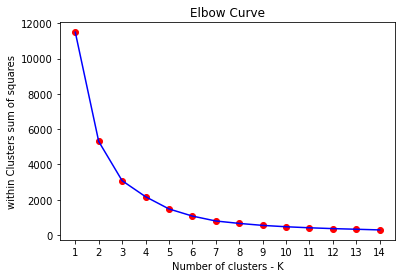

In [12]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of clusters - K")
plt.ylabel("within Clusters sum of squares")
plt.title("Elbow Curve")
plt.xticks(range(1,15,1))

In [13]:
A[["Price","MPG.city"]].head()

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22


In [14]:
B = A[["Price","MPG.city"]]

In [15]:
from sklearn.cluster import KMeans
Km = KMeans(n_clusters=4)
model = Km.fit(B)

In [16]:
B['cluster'] = model.labels_

C:\Users\PRITAM~1\AppData\Local\Temp/ipykernel_7288/1685538784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['cluster'] = model.labels_


In [17]:
B.head()

,Price,MPG.city,cluster
0,15.9,25,2
1,33.9,18,0
2,29.1,20,0
3,37.7,19,0
4,30.0,22,0


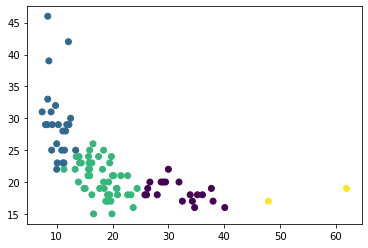

In [18]:
import matplotlib.pyplot as plt
plt.scatter(B['Price'],B['MPG.city'],c=B.cluster)

In [19]:
B["Make"]=A.Make

C:\Users\PRITAM~1\AppData\Local\Temp/ipykernel_7288/248919640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["Make"]=A.Make


In [21]:
B.head(10)

,Price,MPG.city,cluster,Make
0,15.9,25,2,Acura Integra
1,33.9,18,0,Acura Legend
2,29.1,20,0,Audi 90
3,37.7,19,0,Audi 100
4,30.0,22,0,BMW 535i
5,15.7,22,2,Buick Century
6,20.8,19,2,Buick LeSabre
7,23.7,16,2,Buick Roadmaster
8,26.3,19,0,Buick Riviera
9,34.7,16,0,Cadillac DeVille


In [22]:
a = input("Enter any car Make: ")
cluster_no_for_car = B[B.Make == a].cluster.values[0]
print("Cars that are similar to your Cars are: ")
print(B[B.cluster == cluster_no_for_car].Make.values)

Enter any car Make: Buick Riviera
Cars that are similar to your Cars are: 
['Acura Legend' 'Audi 90' 'Audi 100' 'BMW 535i' 'Buick Riviera'
 'Cadillac DeVille' 'Cadillac Seville' 'Chevrolet Corvette'
 'Chrysler Imperial' 'Dodge Stealth' 'Lexus ES300' 'Lexus SC300'
 'Lincoln Continental' 'Lincoln Town_Car' 'Mazda RX-7'
 'Mercedes-Benz 190E' 'Mitsubishi Diamante' 'Saab 900' 'Volvo 850']


In [24]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
B = A[["MPG.city","Price","Horsepower","Length"]]
model = agc.fit(B)

In [25]:
model.labels_

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       3, 3, 1, 1, 1, 2, 3, 0, 3, 1, 3, 1, 1, 1, 1, 0, 3, 3, 0, 3, 1, 3,
       1, 3, 1, 2, 0, 0, 0, 0, 3, 3, 0, 0, 2, 1, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 1, 0, 1, 0], dtype=int64)

In [26]:
A["cluster"]= model.labels_

In [27]:
A[A.cluster == 2][["Model"]]

,Model
10,Seville
18,Corvette
27,Stealth
47,Q45
56,RX-7


# Creation of Dendrogram

In [28]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\PRITAM~1\AppData\Local\Temp/ipykernel_7288/3653089140.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram(linkage(D))


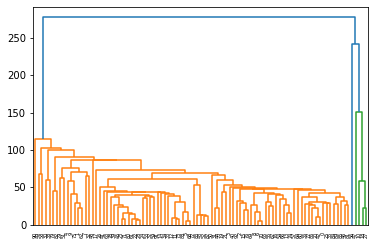

In [29]:
D = pd.DataFrame(distance_matrix(B.values,B.values))
dendrogram(linkage(D))
plt.show()